# Classification Model

# Titanic Data Analysis with Logistic Regression
*   Step 1: Import Libraries and Load Data
*   Step 2: Preprocessing
*   Step 3: Train-Test Split
*   Step 4: Train Logistic Regression Model
*   Step 5: Evaluate Model
*   Step 6: Interpret Coefficients


In [1]:
#Step 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#Step 2: Preprocessing

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
df = df[features + ['Survived']]

# Handle missing values
#df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age'] = df['Age'].fillna(df.median(numeric_only=True))

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male:1, female:0

# Define X and y
X = df[features]
y = df['Survived']

df.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [3]:
#Step 2: Preprocessing

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
df = df[features + ['Survived']]

# Handle missing values
# Instead of using median for all columns, fillna for each column separately
for column in features:
    if df[column].isnull().any():  # Check if column has missing values
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column] = df[column].fillna(df[column].median())
        else:
            # Handle missing values for categorical columns with mode or a placeholder
            df[column] = df[column].fillna(df[column].mode()[0])

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male:1, female:0

# Define X and y
X = df[features]
y = df['Survived']

# Impute missing values using SimpleImputer after defining X and y
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') # or 'most_frequent' for categorical features
X = imputer.fit_transform(X)

df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [4]:
#Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
#Step 4: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [6]:
#Step 5: Evaluate Model
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[92 13]
 [21 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [7]:
#Step 6: Interpret Coefficients
# Get feature names used in the model
feature_names = imputer.get_feature_names_out(features)

df_co = pd.DataFrame({
    'Feature': feature_names,  # Use feature names from the imputer
    'Coefficient': model.coef_[0]
})
print(df_co)


  Feature  Coefficient
0  Pclass    -0.928188
1     Sex    -2.610598
2     Age    -0.031452
3   SibSp    -0.315802
4   Parch    -0.125203
5    Fare     0.003434


# Iris Data Analysis with KNN : How KNN works:
*   Choose the number of neighbors k.
*   Calculate the distance (e.g., Euclidean) between the test point and all training data.
*   Select the k nearest neighbors.
*   Assign the most common class (classification) or the average value (regression).

In [8]:
#Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [9]:
#Step2: Load data
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for analysis
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df.head())
print(df.describe())
print("Label Encoding:\n", df['target'].value_counts())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

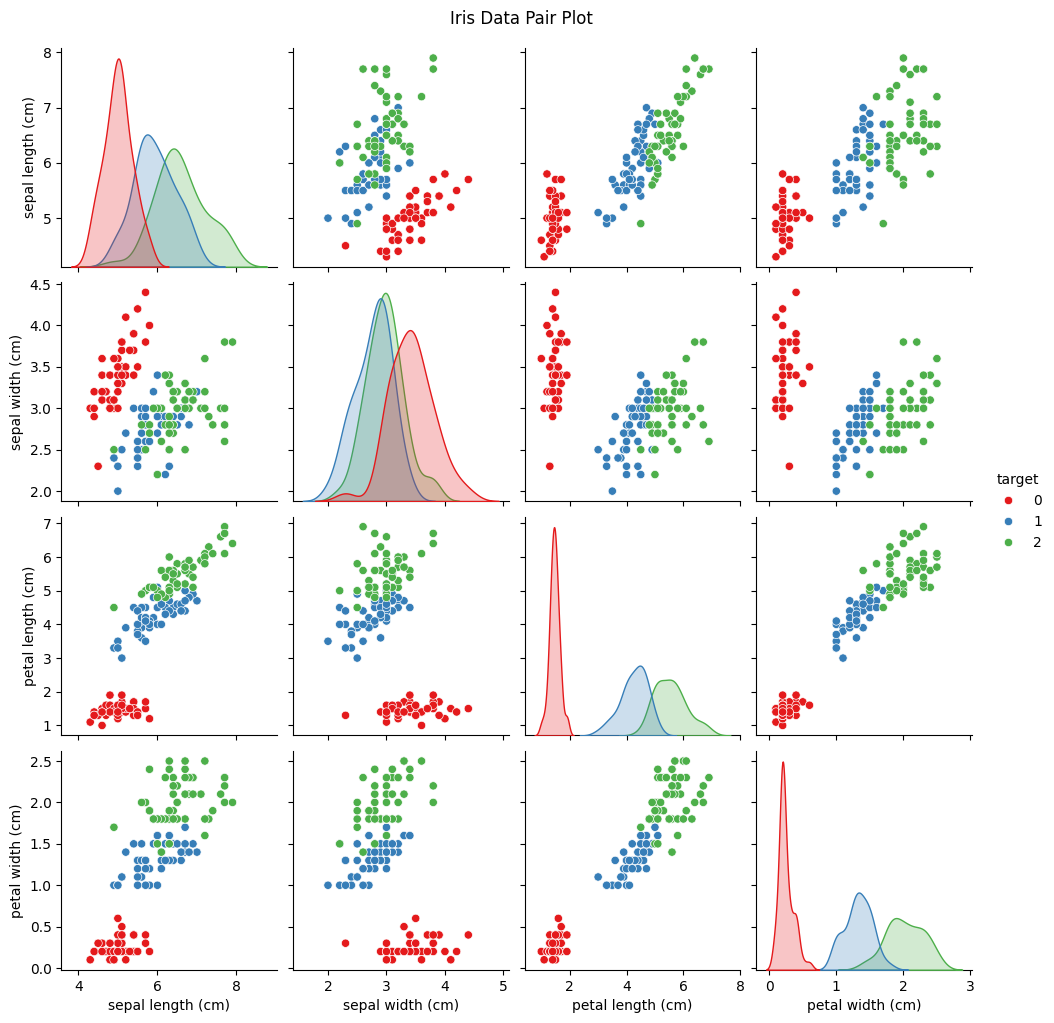

In [10]:
#Step 2/1: Visualizing the Data (Optional)
import seaborn as sns
sns.pairplot(df, hue='target', palette='Set1')
plt.suptitle("Iris Data Pair Plot", y=1.02)
plt.show()


In [11]:
#Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
#Step 4: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


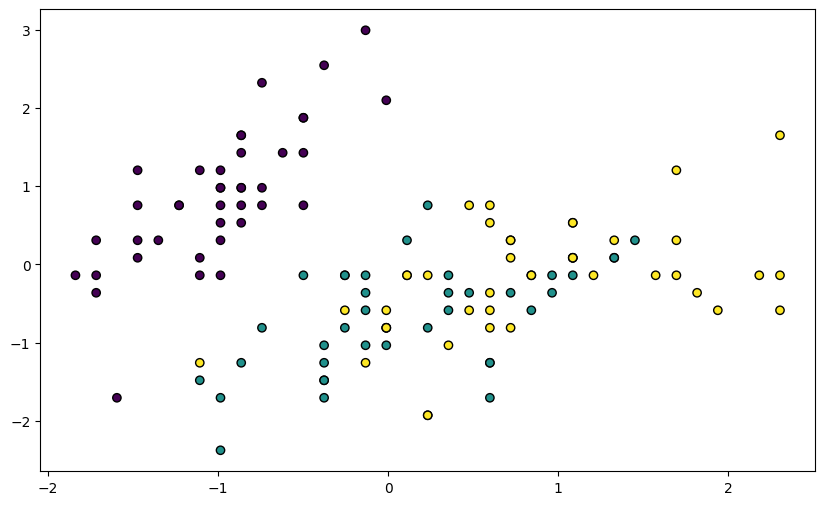

In [13]:
#Step 5: Train KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#set scatter graph
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')

In [14]:
#Step 6: Make Predictions and Evaluate
y_pred = knn.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy:  1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
#Step 7:Predicting a New Case
#New case: Sepal length=5.1, Sepal width=3.5, Petal length=1.4, Petal width=0.2

new_case = np.array([[5.1, 3.5, 1.4, 0.2]])

# Apply same scaling
new_case_scaled = scaler.transform(new_case)

# Predict
predicted_class = knn.predict(new_case_scaled)
predicted_label = iris.target_names[predicted_class[0]]

print(f"The predicted class for the new sample is: {predicted_label}")


The predicted class for the new sample is: setosa


# Iris Data Analysis with Decison Tree :
Use the Iris dataset (a classic dataset for classification) and build a
Decision Tree model to classify flower species based on their features.

In [16]:
#Step 1: Import Libraries and Load Data
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
#Step 2: Train Decision Tree Model
# Create and train the model

dtm = DecisionTreeClassifier(random_state=42)
dtm.fit(X_train, y_train)

y_pred = dtm.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
#Step 3: Predict on a New Case
#New case: Sepal length=5.1, Sepal width=3.5, Petal length=1.4, Petal width=0.2

new_case = np.array([[5.1, 3.5, 1.4, 0.2]])

# Apply same scaling
new_case_scaled = scaler.transform(new_case)

# Predict
predicted_class = dtm.predict(new_case_scaled)
predicted_label = iris.target_names[predicted_class[0]]

print(f"The predicted class for the new sample is: {predicted_label}")

The predicted class for the new sample is: setosa


# Neural Network with Python (using scikit-learn)
Use the Iris dataset (a classic dataset for classification) and build a Neural Network model to classify flower species based on their features.

In [19]:
#Step 1: Import Libraries and Load Data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame (optional: for inspection)
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [20]:
#Step 2: Preprocess and Split the Data
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [21]:
#Step 3: Train the Neural Network Model
# Initialize and train MLP (Multilayer Perceptron)
model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)

In [22]:
#Step 4: Evaluate the Model
# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [23]:
#Step 5: Predict the new case
# New sample (e.g., Sepal Length: 5.1, Sepal Width: 3.5, Petal Length: 1.4, Petal Width: 0.2)
new_sample = [[5.1, 3.5, 1.4, 0.2]]
new_sample_scaled = scaler.transform(new_sample)

# Predict class
prediction = model.predict(new_sample_scaled)
predicted_class = iris.target_names[prediction[0]]
print("Predicted class for new sample:", predicted_class)


Predicted class for new sample: setosa
